# Justin Zarkovacki CS-4820
## 9/20/2022

### Required imports

In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, AveragePooling2D, Flatten, Dense
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt

### Initialize training/test datasets and other important variables

In [45]:
batch_size = 128
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

def load(f):
    return np.load(f)['arr_0']

# Load the data
train_images = load('Datasets\Kuzushiji-MNIST - train-imgs.npz')
test_images = load('Datasets\Kuzushiji-MNIST - test-imgs.npz')
train_labels = load('Datasets\Kuzushiji-MNIST - train-labels.npz')
test_labels = load('Datasets\Kuzushiji-MNIST - test-labels.npz')

k49_train_images = load('Datasets\Kuzushiji-49 - train-imgs.npz')
k49_test_images = load('Datasets\Kuzushiji-49 - test-imgs.npz')
k49_train_labels = load('Datasets\Kuzushiji-49 - train-labels.npz')
k49_test_labels = load('Datasets\Kuzushiji-49 - test-labels.npz')

if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
print('{} train samples, {} test samples'.format(len(train_images), len(test_images)))

60000 train samples, 10000 test samples


### Define Creation of the Model

In [46]:
def generate_model(num_of_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid"))
    model.add(Flatten())
    model.add(Dense(num_of_classes, activation='relu'))
    model.add(Dense(num_of_classes))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])
    
    return model

### Create Model - MNIST

In [ ]:
num_classes = 10
mnist_model = generate_model(num_classes)
mnist_model.summary()

### Run Model - MNIST

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

mnist_history = mnist_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(test_images, test_labels))

mnist_model.save('justin_mnist_model')

### Visualize Results - MNIST

In [ ]:
accuracy_data = mnist_history.history['accuracy']
val_accuracy_data = mnist_history.history['val_accuracy']

lower_bound = min(min(accuracy_data), min(val_accuracy_data))

plt.plot(accuracy_data, label='Train Accuracy')
plt.plot(val_accuracy_data, label = 'Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([lower_bound - 0.01, 1])
plt.legend(loc='lower right')

test_loss, test_acc = mnist_model.evaluate(test_images,  test_labels, verbose=2)

### Create Model - KMNIST

In [47]:
num_classes = 10
kmnist_model = generate_model(num_classes)
kmnist_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_11 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_11 (Avera  (None, 12, 12, 64)       0         
 gePooling2D)                                                    
                                                                 
 flatten_11 (Flatten)        (None, 9216)              0         
                                                                 
 dense_22 (Dense)            (None, 10)                92170     
                                                     

### Run Model - KMNIST

In [48]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kmnist_history = kmnist_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(test_images, test_labels))

kmnist_model.save('justin_kmnist_model')

Epoch 1/12
469/469 [==============================] - 71s 149ms/step - loss: 0.7847 - accuracy: 0.7475 - val_loss: 0.8119 - val_accuracy: 0.7536
Epoch 2/12
469/469 [==============================] - 70s 149ms/step - loss: 0.3243 - accuracy: 0.9031 - val_loss: 0.6287 - val_accuracy: 0.8152
Epoch 3/12
469/469 [==============================] - 72s 153ms/step - loss: 0.2394 - accuracy: 0.9299 - val_loss: 0.5412 - val_accuracy: 0.8398
Epoch 4/12
469/469 [==============================] - 75s 160ms/step - loss: 0.1944 - accuracy: 0.9428 - val_loss: 0.5162 - val_accuracy: 0.8508
Epoch 5/12
469/469 [==============================] - 72s 154ms/step - loss: 0.1670 - accuracy: 0.9510 - val_loss: 0.4348 - val_accuracy: 0.8796
Epoch 6/12
469/469 [==============================] - 74s 159ms/step - loss: 0.1438 - accuracy: 0.9574 - val_loss: 0.4104 - val_accuracy: 0.8855
Epoch 7/12
469/469 [==============================] - 74s 159ms/step - loss: 0.1260 - accuracy: 0.9624 - val_loss: 0.3960 - val_ac

### Visualize Results - KMNIST

313/313 - 4s - loss: 0.3683 - accuracy: 0.9066 - 4s/epoch - 12ms/step


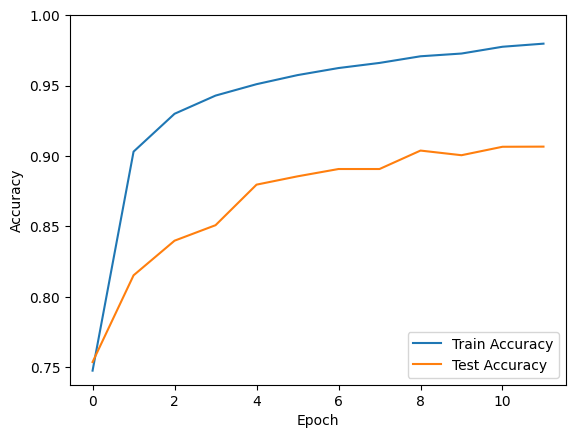

In [53]:
accuracy_data = kmnist_history.history['accuracy']
val_accuracy_data = kmnist_history.history['val_accuracy']

lower_bound = min(min(accuracy_data), min(val_accuracy_data))

plt.plot(accuracy_data, label='Train Accuracy')
plt.plot(val_accuracy_data, label = 'Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([lower_bound - 0.01, 1])
plt.legend(loc='lower right')

test_loss, test_acc = kmnist_model.evaluate(test_images,  test_labels, verbose=2)

### Create Model - Kuzushiji-49

In [50]:
num_classes = 49
k49_model = generate_model(num_classes)
k49_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_12 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_12 (Avera  (None, 12, 12, 64)       0         
 gePooling2D)                                                    
                                                                 
 flatten_12 (Flatten)        (None, 9216)              0         
                                                                 
 dense_24 (Dense)            (None, 49)                451633    
                                                     

### Run Model - Kuzushiji-49

In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

k49_history = k49_model.fit(k49_train_images, k49_train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(k49_test_images, k49_test_labels))

k49_model.save('justin_k49_model')

Epoch 1/12
1816/1816 [==============================] - 287s 158ms/step - loss: 1.8148 - accuracy: 0.5293 - val_loss: 1.3043 - val_accuracy: 0.6820
Epoch 2/12
1816/1816 [==============================] - 1484s 817ms/step - loss: 0.5504 - accuracy: 0.8555 - val_loss: 0.7958 - val_accuracy: 0.7992
Epoch 3/12
1816/1816 [==============================] - 277s 152ms/step - loss: 0.3610 - accuracy: 0.9025 - val_loss: 0.6670 - val_accuracy: 0.8324
Epoch 4/12
1816/1816 [==============================] - 301s 166ms/step - loss: 0.2828 - accuracy: 0.9212 - val_loss: 0.6269 - val_accuracy: 0.8457
Epoch 5/12
1816/1816 [==============================] - 297s 164ms/step - loss: 0.2371 - accuracy: 0.9328 - val_loss: 0.6058 - val_accuracy: 0.8479
Epoch 6/12
1816/1816 [==============================] - 292s 161ms/step - loss: 0.2030 - accuracy: 0.9415 - val_loss: 0.6024 - val_accuracy: 0.8586
Epoch 7/12
1816/1816 [==============================] - 305s 168ms/step - loss: 0.1795 - accuracy: 0.9479 - val

### Vizualize Results - Kuzushiji-49

313/313 - 5s - loss: 9.7281 - accuracy: 0.0000e+00 - 5s/epoch - 15ms/step


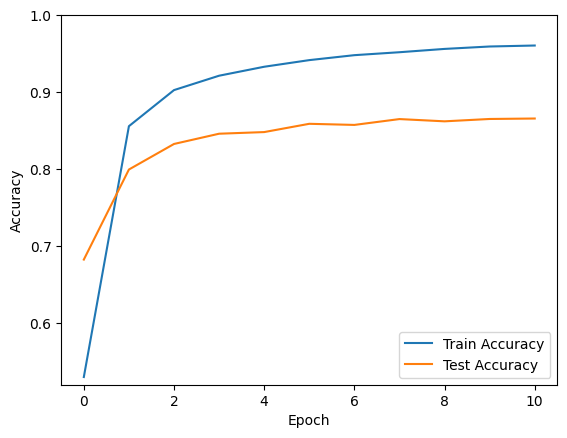

In [54]:
accuracy_data = k49_history.history['accuracy']
val_accuracy_data = k49_history.history['val_accuracy']

lower_bound = min(min(accuracy_data), min(val_accuracy_data))

plt.plot(accuracy_data, label='Train Accuracy')
plt.plot(val_accuracy_data, label = 'Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([lower_bound - 0.01, 1])
plt.legend(loc='lower right')

test_loss, test_acc = k49_model.evaluate(test_images,  test_labels, verbose=2)